In [1]:
import numpy as np
import sklearn
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

Open the data file

In [2]:
data_df = pd.read_csv('../input/creditcard.csv')

In [3]:
data_df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
#check if the df contains any NaN values

data_df.isnull().values.any()

False

In [5]:
classes = data_df.Class.unique()
print(classes)

[0 1]


In [6]:
print('class corresponding to non-fraud', classes[0],': ', len(data_df[data_df.Class==classes[0]]))
print('class corresponding to fraud', classes[1],': ', len(data_df[data_df.Class==classes[1]]))

class corresponding to non-fraud 0 :  284315
class corresponding to fraud 1 :  492


In [7]:
#transform the dataframe to an array
data = data_df.as_matrix()

X_data = data[:,:(data_df.shape[1]-1)]
y_data = data[:,(data_df.shape[1]-1)]

In [8]:
#split the data into training and test data
from sklearn.model_selection import train_test_split

X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size=0.25)

In [9]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_data_train = scaler.fit_transform(X_data_train)
X_data_test = scaler.fit_transform(X_data_test)

In [10]:
#train using neural networks
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


#fit decision tree classifier
model_nn = MLPClassifier(hidden_layer_sizes=2, max_iter=2000)
model_nn.fit(X_data_train, y_data_train)

#predict 'y' for test data
y_data_pred_test = model_nn.predict(X_data_test)

#score
print('Accuracy: ', accuracy_score(y_data_test, y_data_pred_test))
print('confusion matrix:', confusion_matrix(y_data_test, y_data_pred_test))
print('F1:', f1_score(y_data_test, y_data_pred_test))

Accuracy:  0.999410128929
confusion matrix: [[71048    15]
 [   27   112]]
F1: 0.842105263158


In [11]:
#this is the data corresponding to fraud
data_fraud_df = data_df[data_df.Class==classes[1]]
data_fraud_df = data_fraud_df.reset_index(drop=True)
data_fraud = data_fraud_df.as_matrix()


#this is the data corresponding to non-fraud
data_nonfraud_df = data_df[data_df.Class==classes[0]]
data_nonfraud_df = data_nonfraud_df.reset_index(drop=True)
data_red_nonfraud_df = \
    data_nonfraud_df.ix[np.random.random_integers(1, max(data_nonfraud_df.index),max(data_fraud_df.index)+1)]
data_red_nonfraud_df = data_red_nonfraud_df.reset_index(drop=True)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: This function is deprecated. Please call randint(1, 284314 + 1) instead


In [12]:
#now lets join both fraud and non-fraud of the same length
data_red_df = pd.concat([data_red_nonfraud_df, data_fraud_df])
data_red = data_red_df.as_matrix()

X_data_red = data_red[:,:(data_red_df.shape[1]-1)]
y_data_red = data_red[:,(data_red_df.shape[1]-1)]

In [13]:
#define train and test of the symmetric data
X_data_red_train, X_data_red_test, y_data_red_train, y_data_red_test =\
            train_test_split(X_data_red, y_data_red, test_size=0.25)

In [14]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_data_red_train = scaler.fit_transform(X_data_red_train)
X_data_red_test = scaler.fit_transform(X_data_red_test)

In [15]:
#again, lets use neural networks

model_nn.fit(X_data_red_train, y_data_red_train)

#predict 'y' for test data
y_data_red_pred_test = model_nn.predict(X_data_red_test)

#score
print('Accuracy: ', accuracy_score(y_data_red_test, y_data_red_pred_test))
print('confusion matrix:', confusion_matrix(y_data_red_test, y_data_red_pred_test))
print('F1:', f1_score(y_data_red_test, y_data_red_pred_test))

Accuracy:  0.943089430894
confusion matrix: [[129   3]
 [ 11 103]]
F1: 0.936363636364


In [16]:
#lets look at the cross validation
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

cv = KFold(len(y_data_red_pred_test), 5, shuffle=True, random_state=0)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model_nn, X_data_red_test, y_data_red_pred_test, cv=cv)
print(scores)
print("Mean score: {0:.3f} (+/-{1:.3f})".format(np.mean(scores), sem(scores)))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.98        0.95918367  0.93877551  0.93877551  0.93877551]
Mean score: 0.951 (+/-0.008)


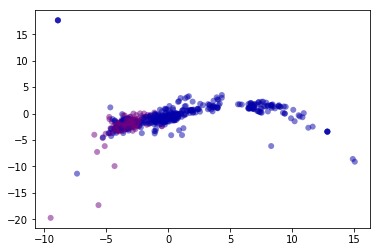

In [17]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=30, n_components=2)

#project the data to 2-dimension features
iso.fit(X_data_red_train[:50,:])
Xdata_red_projected = iso.transform(X_data_red_train)

#visualise the data
plt.scatter(Xdata_red_projected[:, 0], Xdata_red_projected[:, 1], c=y_data_red_train,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral'))

plt.clim(-0.5, 9.5);

# Part 3: Feature reduction
Will this improve our result?

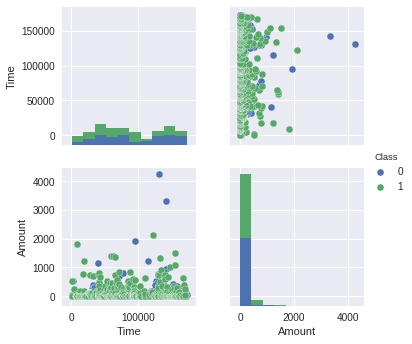

In [18]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(data_red_df, hue='Class',vars=['Time', 'Amount']);

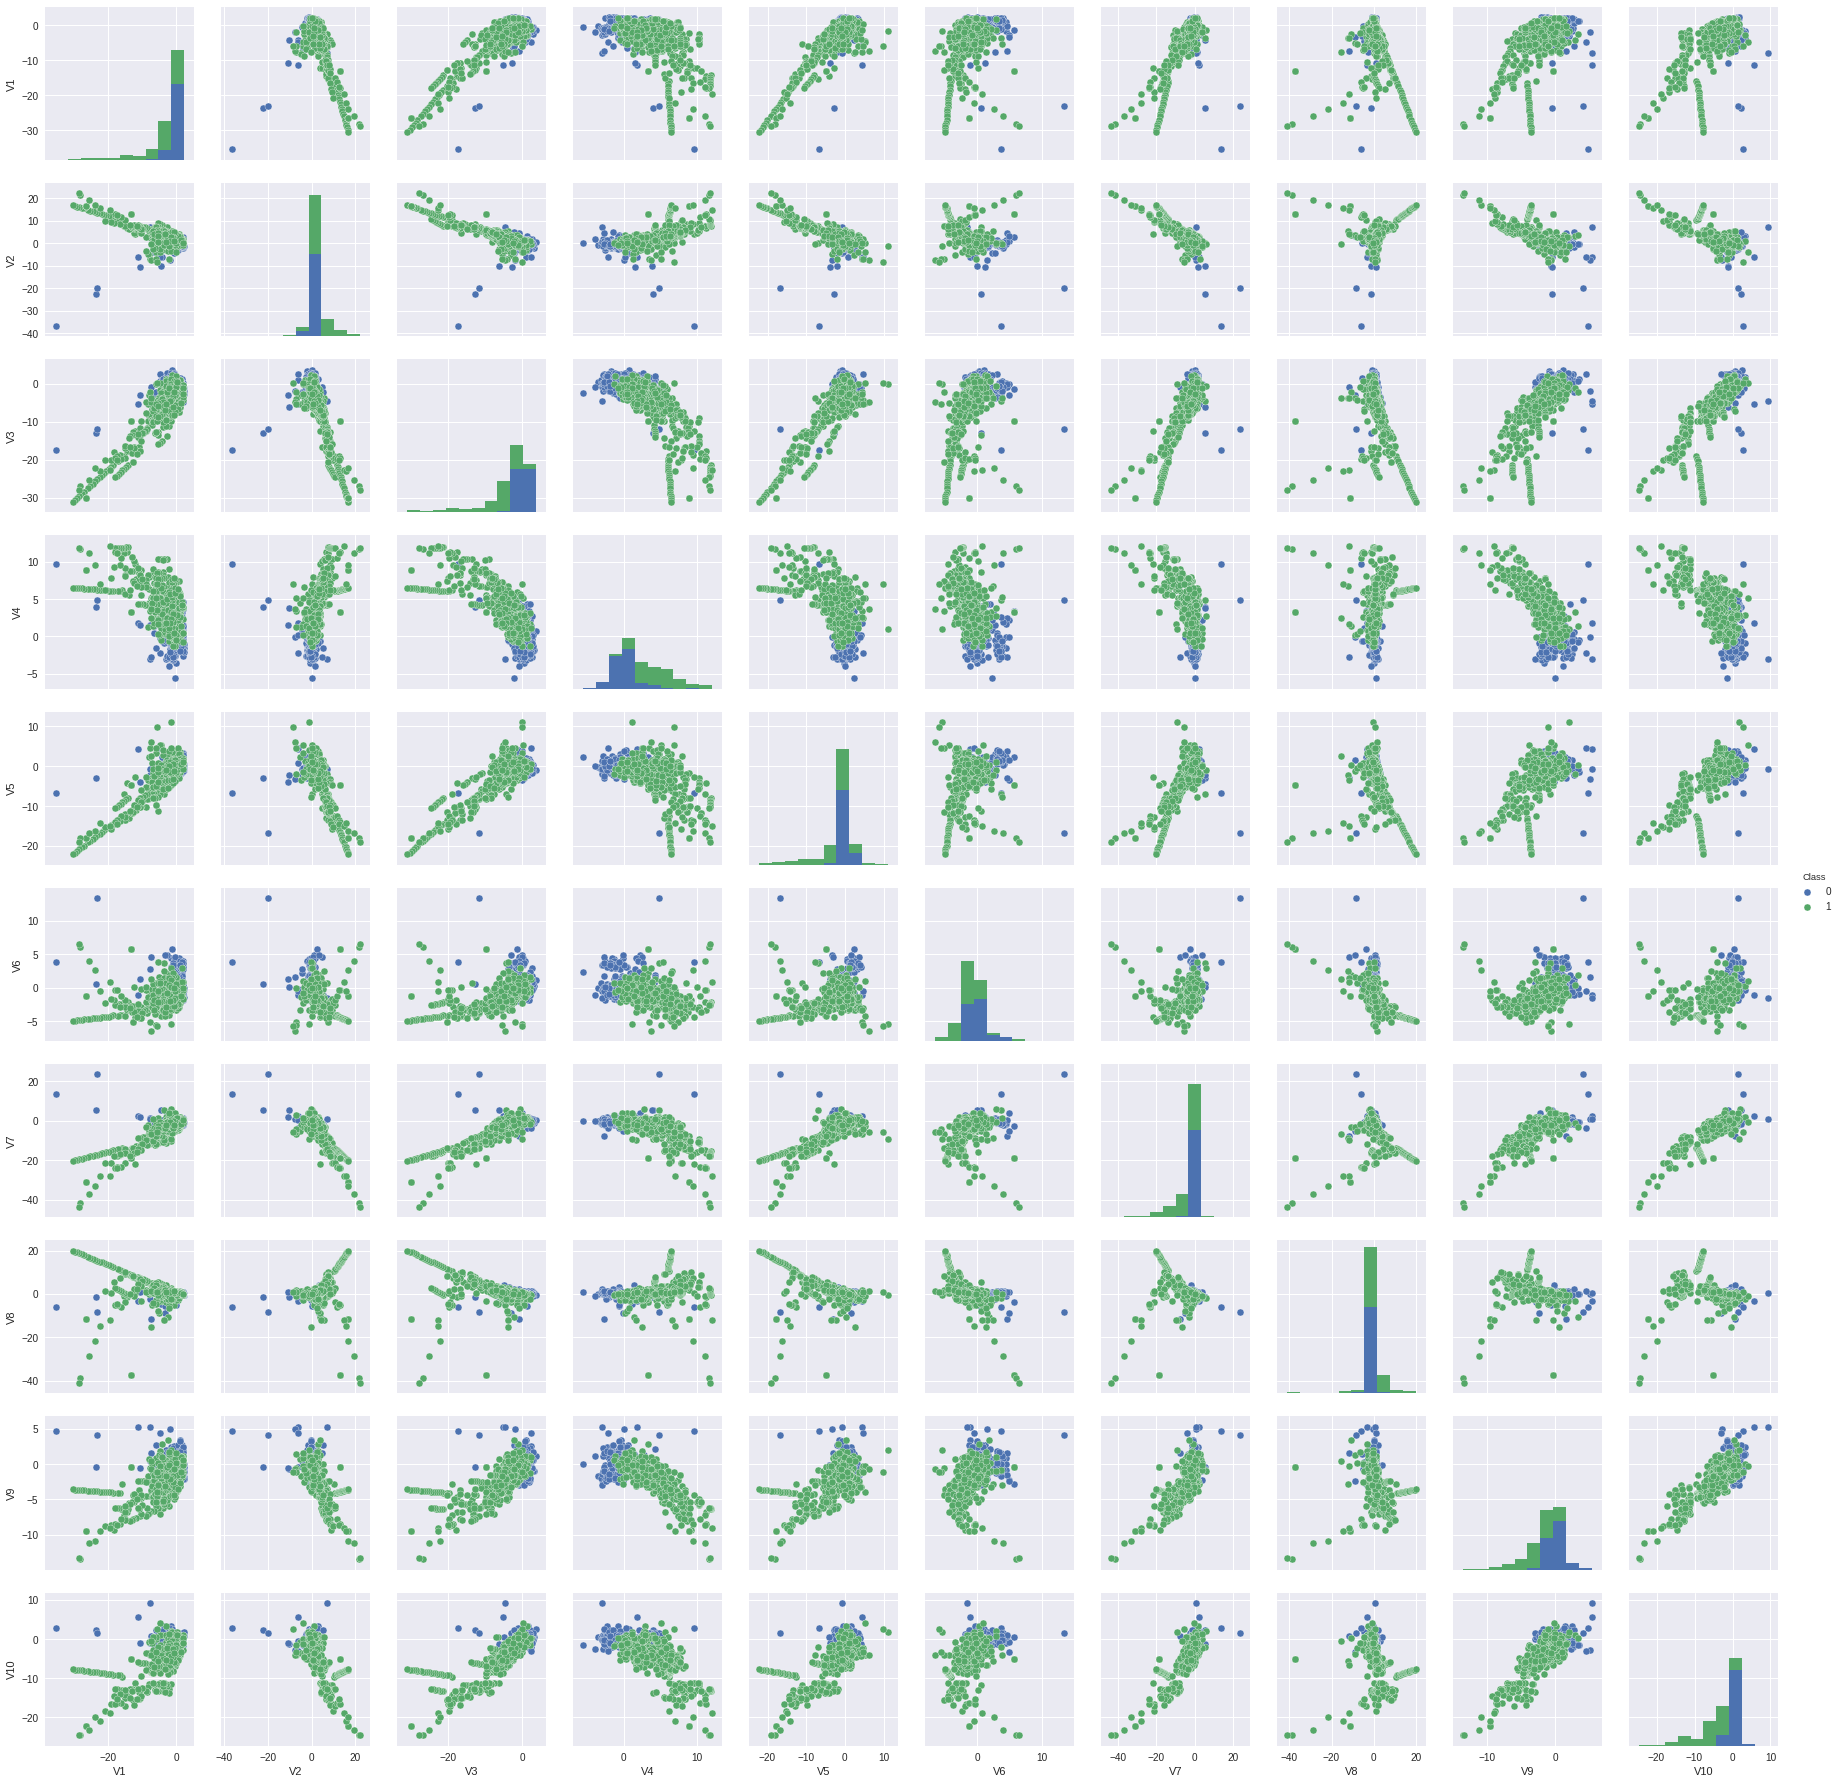

In [19]:
sns.pairplot(data_red_df, hue='Class',vars=['V1','V2','V3','V4', 'V5', 'V6','V7','V8','V9','V10']);

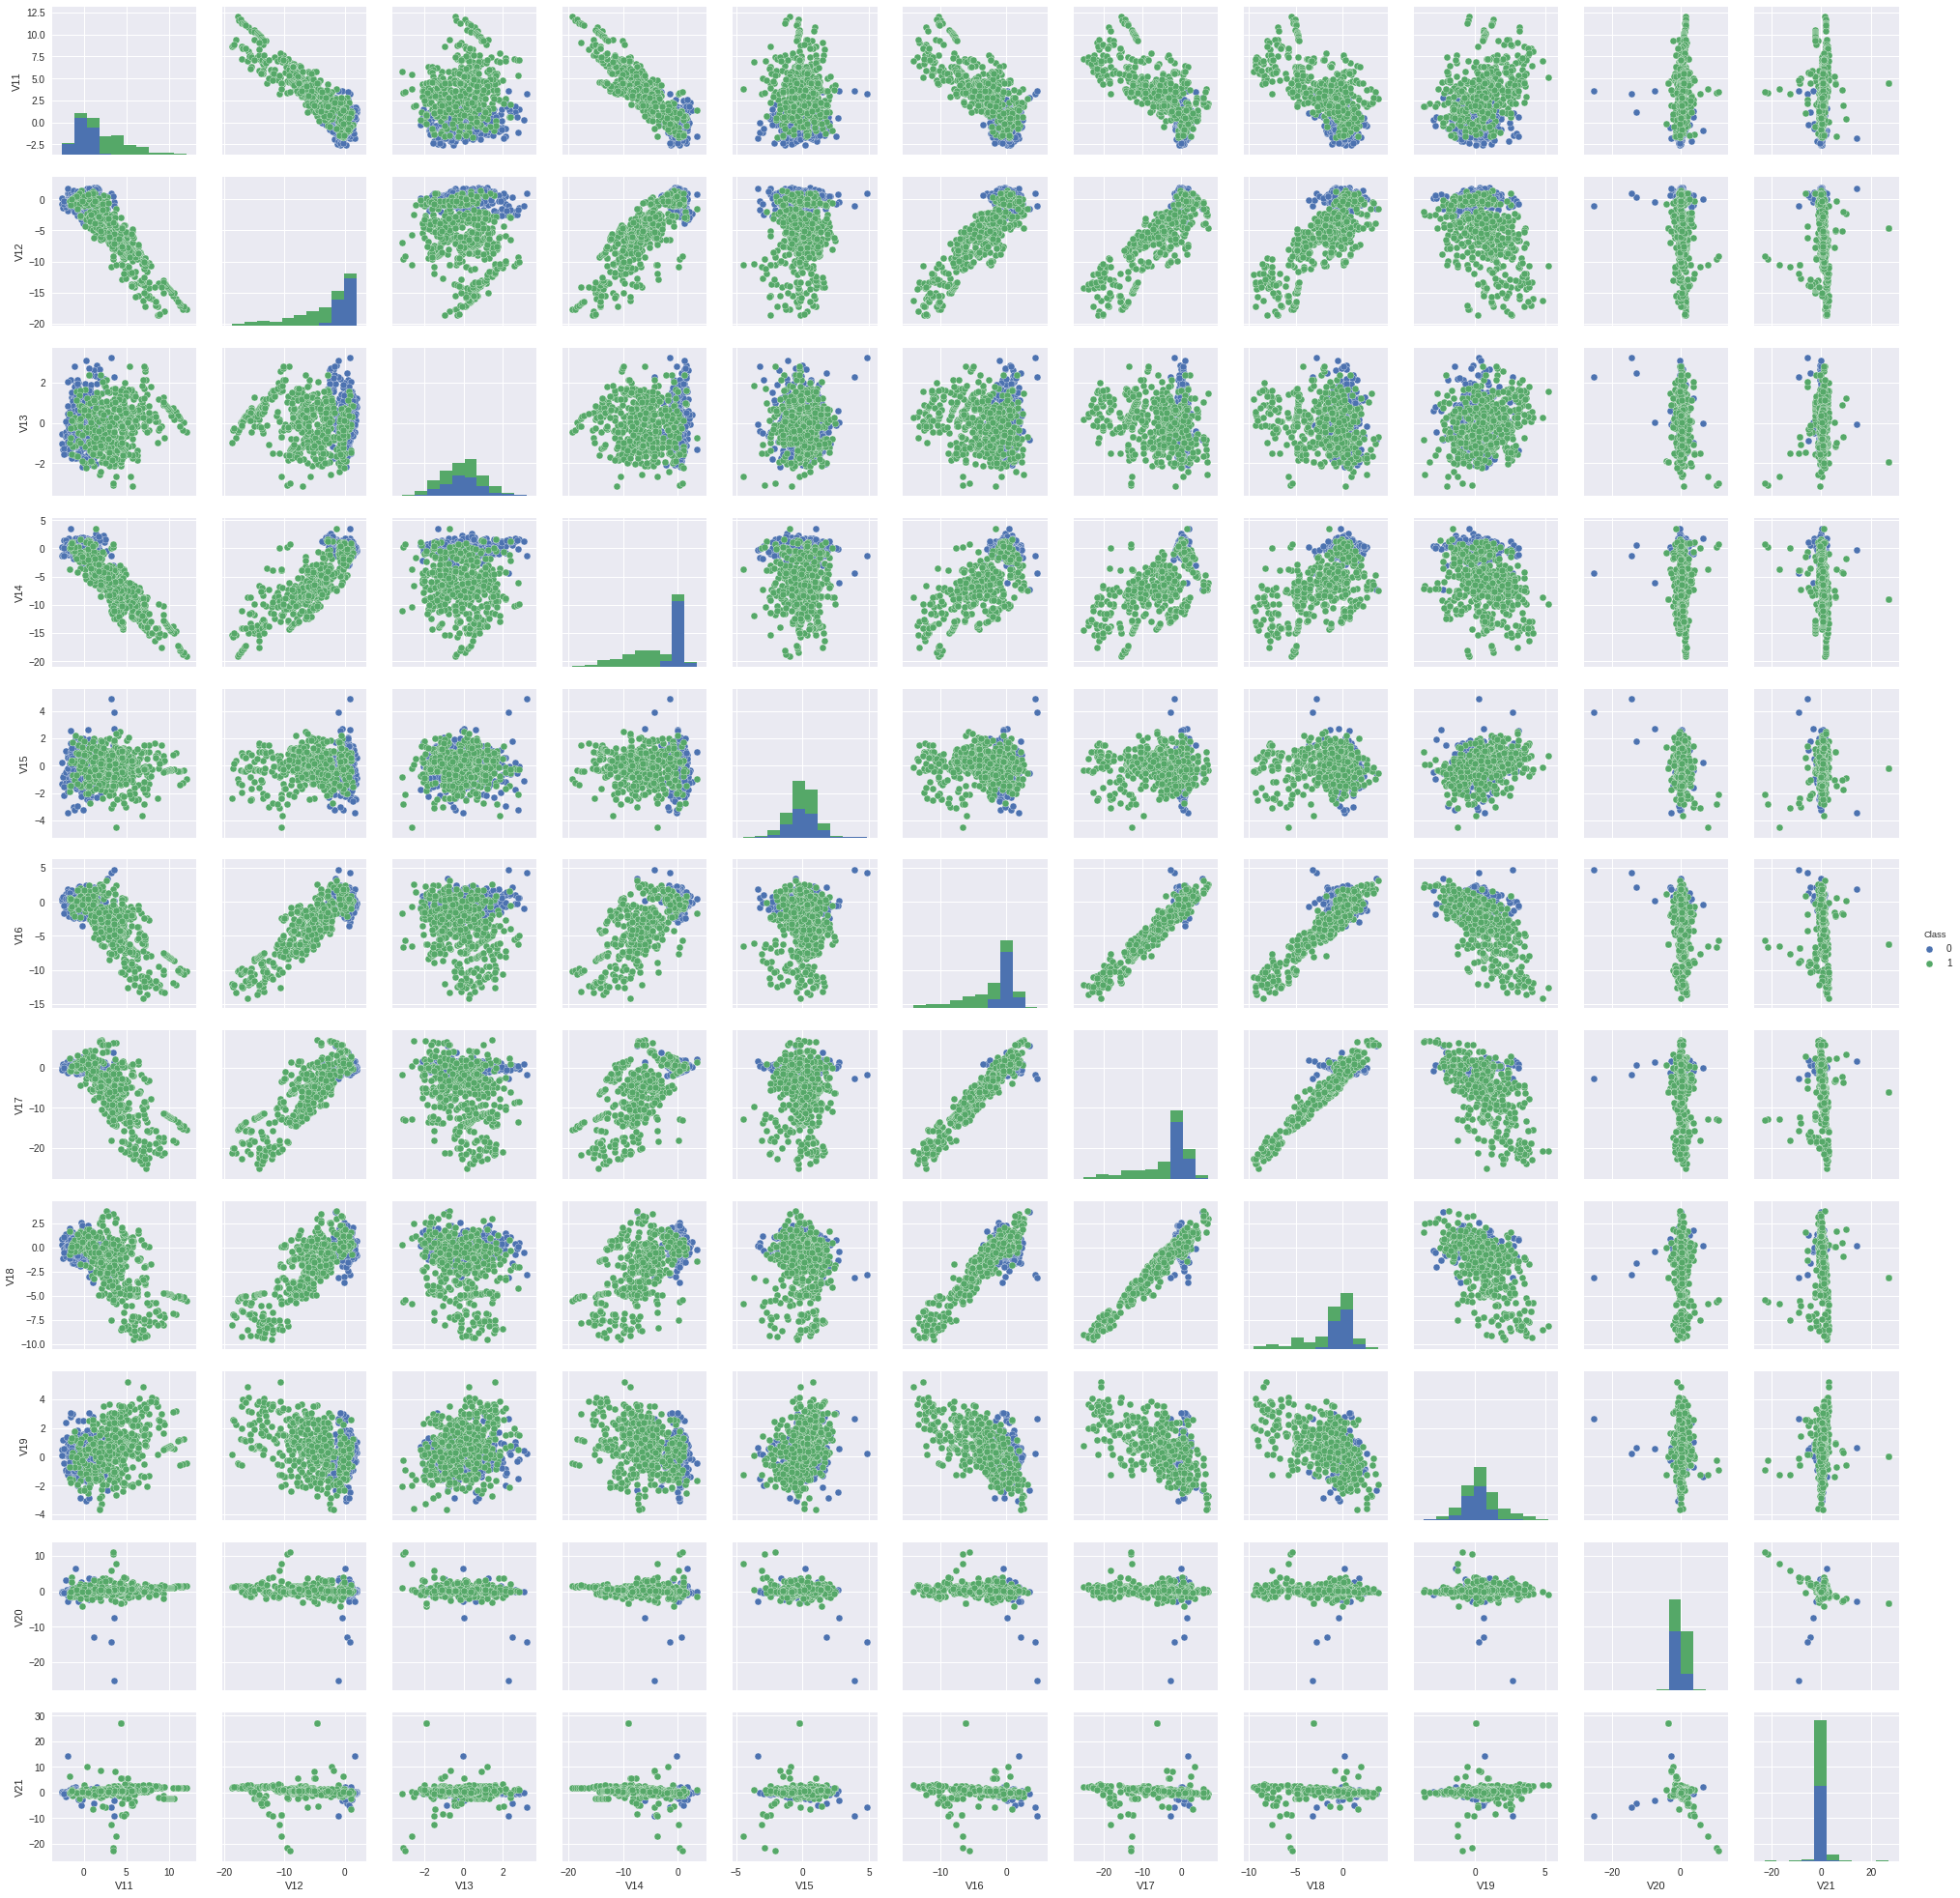

In [20]:
sns.pairplot(data_red_df, hue='Class',vars=[ 'V11', 'V12','V13','V14','V15','V16','V17','V18','V19','V20','V21']);

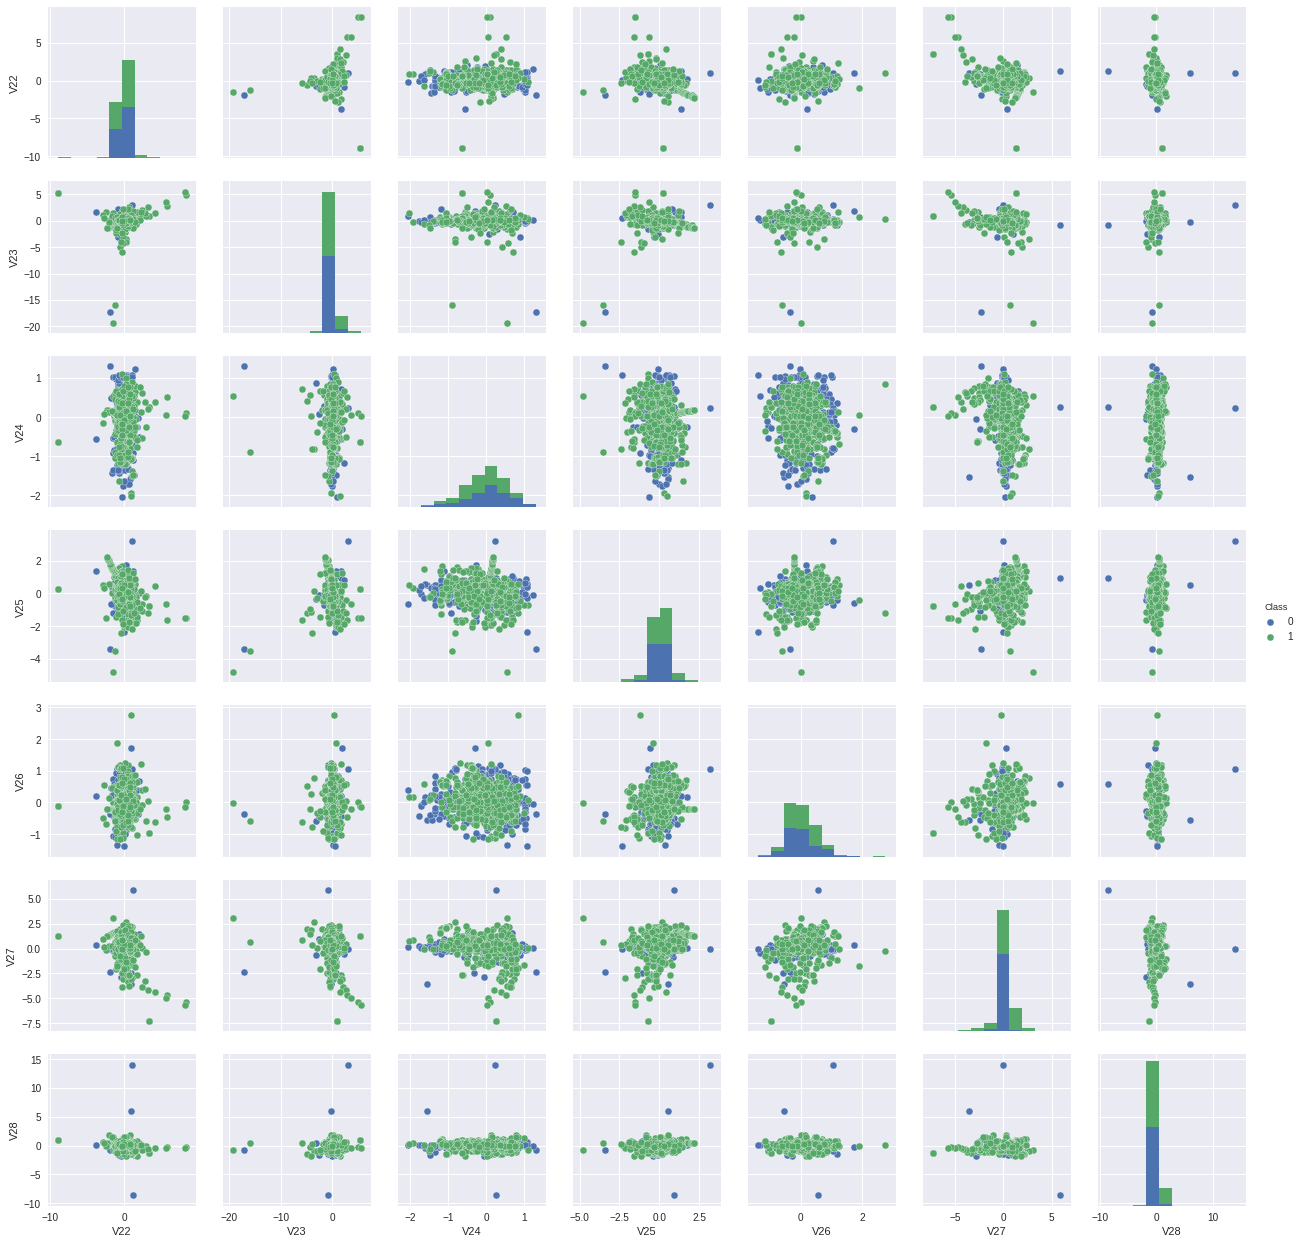

In [21]:
sns.pairplot(data_red_df, hue='Class',vars=[ 'V22','V23','V24','V25','V26','V27','V28']);

It seems that the best features are 'V10', 'V14', 'V16', 'V17'

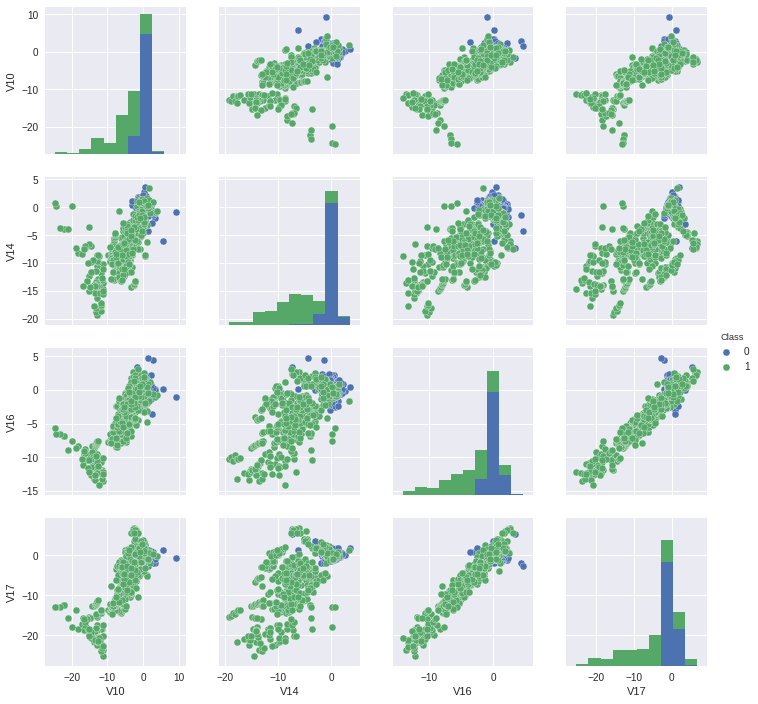

In [22]:
sns.pairplot(data_red_df, hue='Class',vars=['V10','V14','V16','V17']);

In [23]:
data_card_df = pd.concat([data_red_df['V10'],data_red_df['V16'],data_red_df['V14'],\
                            data_red_df['V17'],data_red_df['Class']],axis=1)


data_card = data_card_df.as_matrix()

X = data_card[:,:(data_card_df.shape[1]-1)]
y = data_card[:,(data_card_df.shape[1]-1)]


In [24]:
iso.fit(X[:50,:])
data_projected = iso.transform(X)
data_projected.shape

(984, 2)

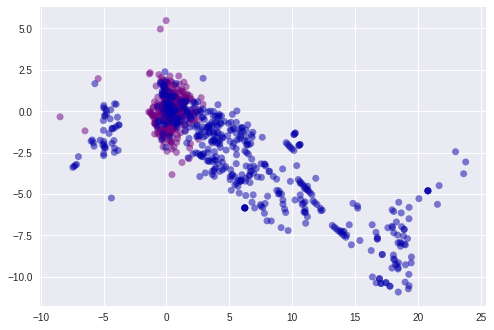

In [25]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=y,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral'))

plt.clim(-0.5, 9.5);

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Decision Tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

#fit decision tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

#predict 'y' for test data
y_pred_test_dt = model_dt.predict(X_test)

#score
print(confusion_matrix(y_test, y_pred_test_dt))
print(f1_score(y_test, y_pred_test_dt))

[[114  14]
 [ 19  99]]
0.857142857143


# Neural networks


In [28]:
#fit data
model_nn.fit(X_train, y_train)

#predict y
y_pred_test_nn = model_nn.predict(X_test)

#score
print(confusion_matrix(y_test, y_pred_test_nn))
print(f1_score(y_test, y_pred_test_nn))

[[128   0]
 [ 26  92]]
0.87619047619


# Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

#fit
model_rf = RandomForestClassifier(criterion='entropy')
model_rf.fit(X_train, y_train)

#predict y
y_pred_test_rf = model_rf.predict(X_test)

#score
print(confusion_matrix(y_test, y_pred_test_rf))
print(f1_score(y_test, y_pred_test_rf))


[[124   4]
 [ 23  95]]
0.875576036866


As expected, the results don't improve much.
Lets look at the cross valudation accuracy:

In [30]:
cv = KFold(len(y), 5, shuffle=True, random_state=0)

scores_dt = cross_val_score(model_dt, X, y, cv=cv)
print(scores_dt)
print("Mean score decision tree: {0:.3f} (+/-{1:.3f})".format(np.mean(scores_dt), sem(scores_dt)))


scores_nn = cross_val_score(model_nn, X, y, cv=cv)
print(scores_nn)
print("Mean score neural networks: {0:.3f} (+/-{1:.3f})".format(np.mean(scores_nn), sem(scores_nn)))
scores_rf = cross_val_score(model_rf, X, y, cv=cv)
print(scores_rf)
print("Mean score random forest: {0:.3f} (+/-{1:.3f})".format(np.mean(scores_rf), sem(scores_rf)))



[ 0.85279188  0.88832487  0.90862944  0.87309645  0.89795918]
Mean score decision tree: 0.884 (+/-0.010)
[ 0.9035533   0.94923858  0.90862944  0.9035533   0.93877551]
Mean score neural networks: 0.921 (+/-0.010)
[ 0.91370558  0.93908629  0.94416244  0.91370558  0.94387755]
Mean score random forest: 0.931 (+/-0.007)
